In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/ML B-4 Research Paper/dataset.xlsx")

In [ ]:
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [ ]:
df.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Mycoplasma pneumoniae,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Density,Urine - Sugar,Urine - Red blood cells,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.010000e+02,6.020000e+02,2.080000e+02,0.0,5.130000e+02,3.970000e+02,5.060000e+02,4.240000e+02,3.710000e+02,3.700000e+02,2.250000e+02,2.260000e+02,1.530000e+02,1.820000e+02,1.820000e+02,1.820000e+02,1.440000e+02,5.000000e+01,4.000000e+01,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.0,1.360000e+02,1.360000e+02,1.360000e+02,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,97.0,7.000000e+01,0.0,7.000000e+01,0.0,9.100000e+01,1.330000e+02,1.010000e+02,0.0,3.000000e+00,1.040000e+02,2.300000e+01,2.700000e+01,8.000000e+00,0.0,1.300000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633740e-09,-3.453010e-09,7.206147e-09,-4.155369e-09,-3.220114e-09,1.020433e-08,7.069992e-09,NaN,5.908361e-09,-6.675260e-09,2.779703e-09,-6.679604e-09,2.038366e-08,1.123628e-08,2.719462e-09,-5.439583e-10,-1.479159e-09,-2.783733e-09,1.205602e-08,3.029357e-09,-2.037268e-09,1.907349e-08,-5.215406e-09,-1.935234e-08,1.509290e-08,-1.075130e-09,-7.909394e-09,0.0,-9.121483e-09,3.593467e-09,-4.416934e-09,2.611544e-09,-2.678753e-08,7.373770e-09,8.602732e-09,1.382582e-08,0.0,-2.554485e-09,NaN,7.557017e-09,NaN,-9.824941e-10,-4.733640e-09,1.733551e-09,NaN,-1.986821e-08,-6.483438e-09,7.288611e-09,-1.655685e-09,-3.725290e-09,NaN,-5.731216e-09,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000833e+00,1.000832e+00,1.002413e+00,NaN,1.000976e+00,1.001262e+00,1.000990e+00,1.001181e+00,1.001350e+00,1.001354e+00,1.002230e+00,1.002220e+00,1.003284e+00,1.002759e+00,1.002759e+00,1.002759e+00,1.003490e+00,1.010153e+00,1.012739e+00,1.003697e+00,1.003697e+00,1.0036

In [ ]:
target=df["SARS-Cov-2 exam result"]

In [ ]:
df["SARS-Cov-2 exam result"].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

In [ ]:
df["SARS-Cov-2 exam result"].value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

The target is not balanced, so we must use f1 score as accuracy will not be relevant.



In [ ]:
df.shape

(5644, 111)

We have 111 colums, that's a lot of data. We can at least delete the first column as we know for sure aren't connected to the SARS-Cov-2 exam result.

In [ ]:
X = df.drop(["Patient ID"], axis=1)

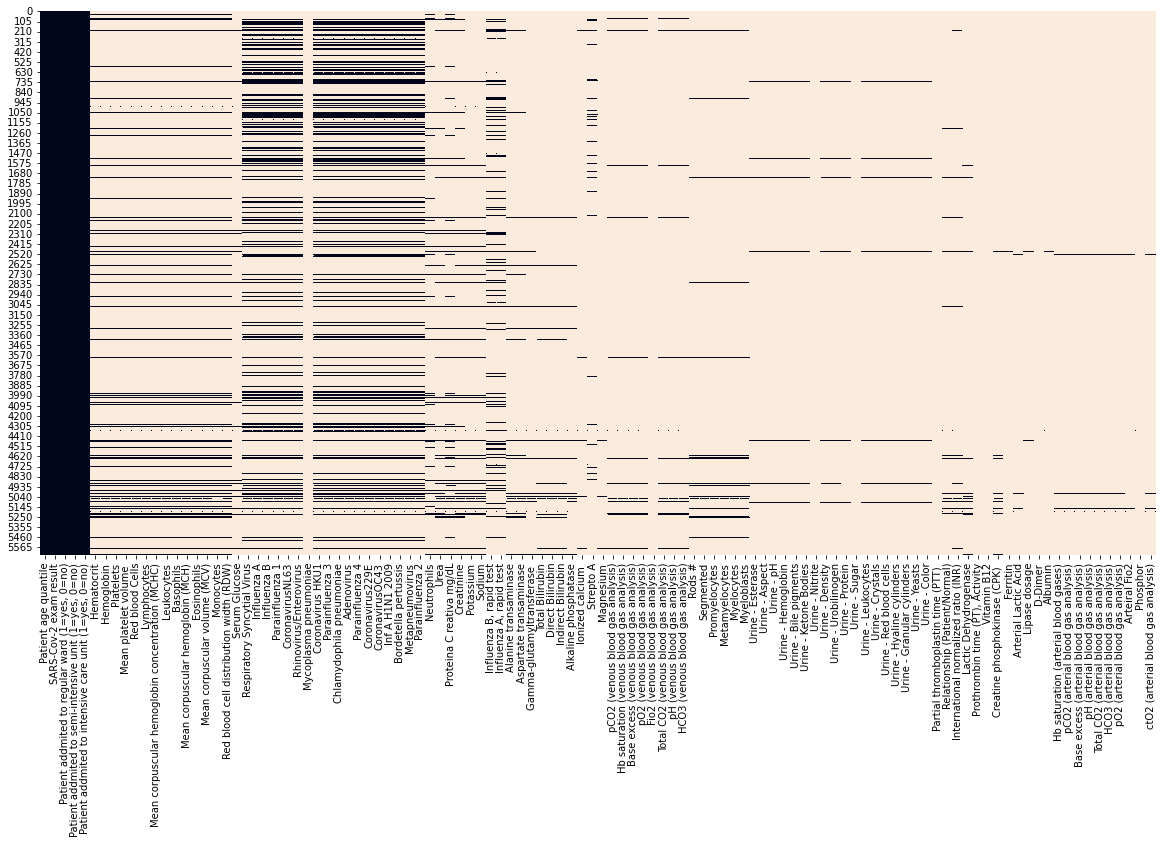

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(X.isna(), cbar=False)

Here we can see that more than half of our columns have less than 20% of data, we only have a few columns where the data is fully mentionned. Let's see which one they are.

In [ ]:
Miss_val = X.isna().sum()/X.shape[0]
print(Miss_val)
Miss_val.sort_values(ascending=False, inplace=True)


Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
                                                           ...   
HCO3 (arterial blood gas analysis)                       0.995216
pO2 (arterial blood gas analysis)                        0.995216
Arteiral Fio2                                            0.996456
Phosphor                                                 0.996456
ctO2 (arterial blood gas analysis)                       0.995216
Length: 110, dtype: float64


In [ ]:
# Columns with 0 missing value
Miss_val[Miss_val == 0]

Patient addmited to intensive care unit (1=yes, 0=no)    0.0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.0
Patient addmited to regular ward (1=yes, 0=no)           0.0
SARS-Cov-2 exam result                                   0.0
Patient age quantile                                     0.0
dtype: float64

In [ ]:
# Columns with high missing value i.e. between(0.8 and 0.9)
Miss_val[(Miss_val<0.9) & (Miss_val>0.8)]

Mean platelet volume                                0.893870
Monocytes                                           0.893515
Red blood Cells                                     0.893338
Lymphocytes                                         0.893338
Mean corpuscular hemoglobin concentration (MCHC)    0.893338
Leukocytes                                          0.893338
Basophils                                           0.893338
Mean corpuscular hemoglobin (MCH)                   0.893338
Eosinophils                                         0.893338
Mean corpuscular volume (MCV)                       0.893338
Platelets                                           0.893338
Red blood cell distribution width (RDW)             0.893338
Hematocrit                                          0.893161
Hemoglobin                                          0.893161
Influenza B, rapid test                             0.854713
Influenza A, rapid test                             0.854713
dtype: float64

In [ ]:
# Columns with high missing value i.e. between(0.7 and 0.8)
Miss_val[(Miss_val<0.8) & (Miss_val>0.7)]

Metapneumovirus                0.760454
Parainfluenza 2                0.760454
Bordetella pertussis           0.760454
Parainfluenza 1                0.760454
CoronavirusNL63                0.760454
Coronavirus HKU1               0.760454
Parainfluenza 3                0.760454
Chlamydophila pneumoniae       0.760454
Adenovirus                     0.760454
Parainfluenza 4                0.760454
Coronavirus229E                0.760454
CoronavirusOC43                0.760454
Inf A H1N1 2009                0.760454
Rhinovirus/Enterovirus         0.760454
Influenza A                    0.760099
Respiratory Syncytial Virus    0.760099
Influenza B                    0.760099
dtype: float64

In [ ]:
df_blood = X[Miss_val[(Miss_val<0.9) & (Miss_val>0.8)].index]
df_viral = X[Miss_val[(Miss_val<0.8) & (Miss_val>0.7)].index]

In [ ]:
# Dropped those columns who has more missing value
X = X[Miss_val[Miss_val < 0.9].index]
##reorder
cols = X.columns.tolist()
cols = cols[-1:] + cols[:-1]
X = X[cols]
##
X

,Patient age quantile,Mean platelet volume,Monocytes,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Platelets,Red blood cell distribution width (RDW),Hematocrit,Hemoglobin,"Influenza B, rapid test","Influenza A, rapid test",Metapneumovirus,Parainfluenza 2,Bordetella pertussis,Parainfluenza 1,CoronavirusNL63,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Rhinovirus/Enterovirus,Influenza A,Respiratory Syncytial Virus,Influenza B,"Patient addmited to intensive care unit (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to regular ward (1=yes, 0=no)",SARS-Cov-2 exam result
0,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,negative
1,17,0.010677,0.357547,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,-0.517413,-0.625073,0.236515,-0.022340,negative,negative,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,0,0,0,negative
2,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,negative
3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,negative
4,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,0,0,0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,positive
5640,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,negative
5641,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,negative
5642,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,negative


In [ ]:
X.isna().sum()

Patient age quantile                                        0
Mean platelet volume                                     5045
Monocytes                                                5043
Red blood Cells                                          5042
Lymphocytes                                              5042
Mean corpuscular hemoglobin concentration (MCHC)         5042
Leukocytes                                               5042
Basophils                                                5042
Mean corpuscular hemoglobin (MCH)                        5042
Eosinophils                                              5042
Mean corpuscular volume (MCV)                            5042
Platelets                                                5042
Red blood cell distribution width (RDW)                  5042
Hematocrit                                               5041
Hemoglobin                                               5041
Influenza B, rapid test                                  4824
Influenz

In [ ]:
num_to_posneg = X['SARS-Cov-2 exam result'].astype('category').cat.categories
X['SARS-Cov-2 exam result'] = X['SARS-Cov-2 exam result'].astype('category').cat.codes
print(f"{num_to_posneg[0]} has been changed to 0, and {num_to_posneg[1]} to 1")

negative has been changed to 0, and positive to 1


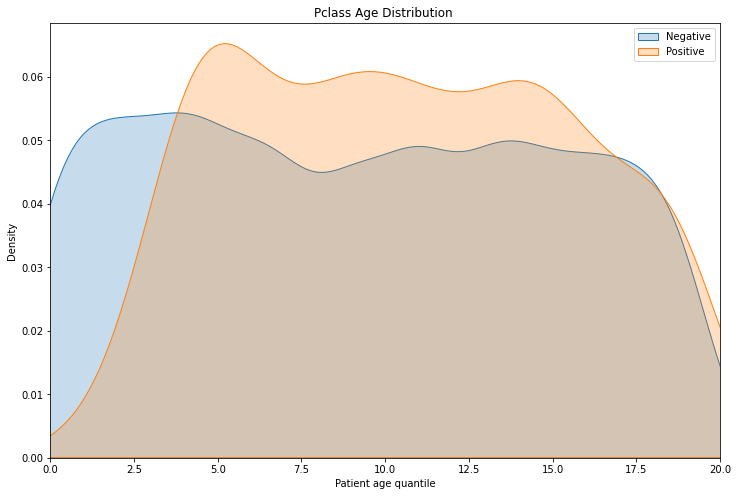

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(X['Patient age quantile'][X['SARS-Cov-2 exam result']== 0], shade=True)
sns.kdeplot(X['Patient age quantile'][X['SARS-Cov-2 exam result'] == 1], shade=True)
plt.xlim(0,20)
plt.legend(['Negative', 'Positive'])
plt.title('Pclass Age Distribution ')
plt.show()

In [ ]:
for col in X.select_dtypes('object'):
    print(f'{col :-<50} {X[col].unique()}') #Make a margin = :-< or :<

Influenza B, rapid test--------------------------- [nan 'negative' 'positive']
Influenza A, rapid test--------------------------- [nan 'negative' 'positive']
Metapneumovirus----------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 2----------------------------------- [nan 'not_detected']
Bordetella pertussis------------------------------ [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus229E--------

In [ ]:
df_dropped_viral = X.dropna(subset=df_viral.columns)
df_dropped_viral['SARS-Cov-2 exam result'].value_counts(normalize=True)

0    0.91716
1    0.08284
Name: SARS-Cov-2 exam result, dtype: float64

In [ ]:
df_dropped_blood = X.dropna(subset=df_blood.columns)
df_dropped_blood['SARS-Cov-2 exam result'].value_counts(normalize=True)

0    0.882653
1    0.117347
Name: SARS-Cov-2 exam result, dtype: float64

In [ ]:
X

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
X_prep = df.drop(["Patient ID"], axis=1)

In [ ]:
X_prep = X_prep.drop(["Parainfluenza 2"], axis=1)

In [ ]:
X_prep = X_prep.drop(["Influenza A, rapid test","Influenza B, rapid test"], axis=1)

In [ ]:
Miss_val = X_prep.isna().sum()/X.shape[0]
X_prep = X_prep.drop(Miss_val[Miss_val >= 0.9].index, axis=1)

In [ ]:
X_prep.shape

(5644, 35)

An idea could be to replace NaN values by an extreme value -999 or to use missing values indicator in columns , however in this case, it makes the predictions worse.







In [ ]:
df_blood = X_prep[Miss_val[(Miss_val<0.9) & (Miss_val>0.8)].index]
df_viral = X_prep[Miss_val[(Miss_val<0.8) & (Miss_val>0.7)].index]

In [ ]:
X_prep = X_prep.dropna().reset_index(drop=True)
X_prep.shape

(362, 35)

In [ ]:
#Encoding categorical data
code = {'negative':0, 'positive':1, 'not_detected':0, 'detected':1}
for col in X_prep.select_dtypes('object').columns: #makes sense right?
    X_prep.loc[:,col] = X_prep[col].map(code)

In [ ]:
Issick = np.zeros(X_prep.shape[0], dtype=int)
for i in range(X_prep.shape[0]):
    if '1' in X_prep.loc[i].unique():
        Issick[i] = 1
    
X_prep["Issick"] = Issick

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Creating the train/test set
y_train = X_prep["SARS-Cov-2 exam result"]
X_train = X_prep.drop(["SARS-Cov-2 exam result"], axis=1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train)

In [ ]:
print(len(X_train))

271


In [ ]:
print(len(X_test))

91


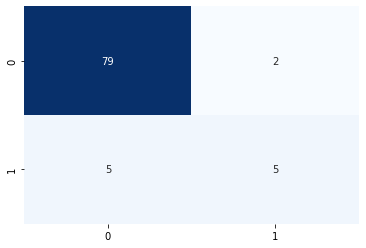

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        81
           1       0.71      0.50      0.59        10

    accuracy                           0.92        91
   macro avg       0.83      0.74      0.77        91
weighted avg       0.92      0.92      0.92        91



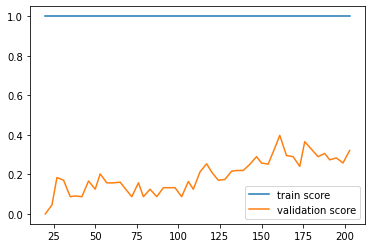

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

def evaluation(model):
    y_pred = model.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues', cbar=False)
    plt.show()
    print(classification_report(y_test,y_pred))

    N, train_score, val_score = learning_curve(model,X_train,y_train, scoring='f1', cv=4, train_sizes=np.linspace(0.1,1))
    plt.plot(N,train_score.mean(axis=1), label='train score')
    plt.plot(N,val_score.mean(axis=1), label='validation score')
    plt.legend()
    plt.show()
    
model = RandomForestClassifier()
model.fit(X_train,y_train)
evaluation(model)

We clearly see overfitting. But now is the time to see the feature importances.


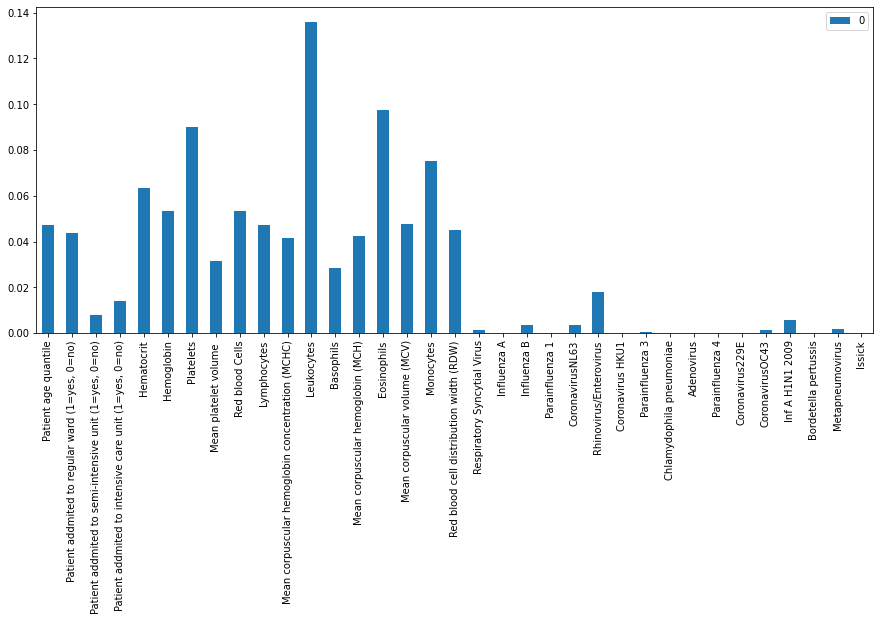

In [ ]:
pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(15,6))
plt.show()

In [ ]:
colu=[]
for col in (pd.DataFrame(model.feature_importances_, index=X_train.columns) > 0.05).transpose().columns:
    if (pd.DataFrame(model.feature_importances_, index=X_train.columns) > 0.05).transpose()[col][0]:
        colu.append(col)
colu.append("SARS-Cov-2 exam result")
X_prep = X_prep[colu]
X_prep

,Hematocrit,Hemoglobin,Platelets,Red blood Cells,Leukocytes,Eosinophils,Monocytes,SARS-Cov-2 exam result
0,0.236515,-0.022340,-0.517413,0.102004,-0.094610,1.482158,0.357547,0
1,-1.571682,-0.774212,1.429667,-0.850035,0.364550,1.018625,0.068652,0
2,-0.747693,-0.586244,-0.429480,-1.361315,-0.884923,-0.666950,1.276759,0
3,0.991838,0.792188,0.072992,0.542763,-0.211488,-0.709090,-0.220244,0
4,1.014726,0.854844,-0.178244,0.489872,-0.075131,0.217977,0.068652,0
...,...,...,...,...,...,...,...,...
357,1.197836,1.356092,-1.911774,0.384090,-0.834833,-0.582671,1.197969,1
358,0.190738,0.165628,-0.102873,0.384090,-0.328365,0.892207,1.066653,0
359,-0.289922,-0.523588,0.663397,0.754327,1.569499,-0.540532,1.670707,0
360,0.717175,1.105468,-0.492289,0.613284,-0.550988,-0.709090,0.909074,0


In [ ]:
# Splitting the data into Train and Test datasets

In [ ]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

best_score = 0

In [ ]:
inertia=[]
n_clusters_list=[]
for n_clusters in range(1,50):
    KM = KMeans(n_clusters=n_clusters)
    KM.fit(X_train,y_train)
    inertia.append(KM.inertia_)
    n_clusters_list.append(n_clusters)

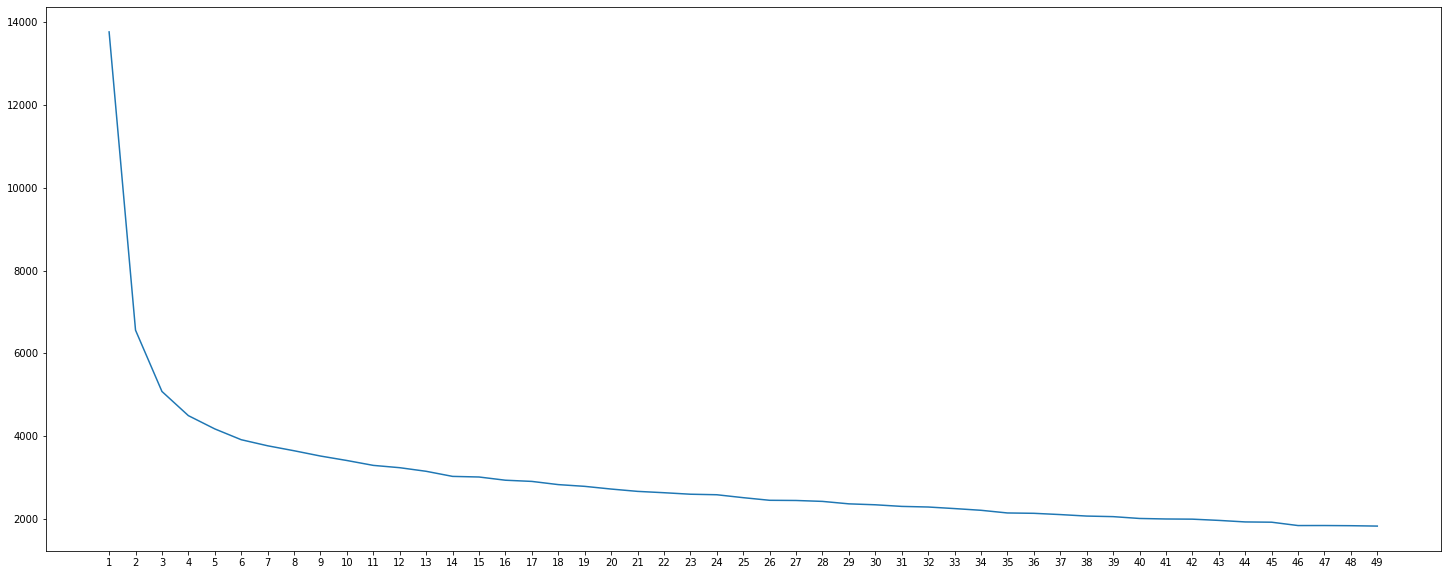

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(n_clusters_list,inertia)
plt.xticks(n_clusters_list)
plt.show()

In [ ]:
from sklearn.metrics.cluster import completeness_score
KM = KMeans(n_clusters=4)
KM.fit(X_train,y_train)
print(f"Best f1 score : {completeness_score(KM.predict(X_test),y_test)} for hyperparameters : n_clusters = 4")

Best f1 score : 0.01336467598145035 for hyperparameters : n_clusters = 4


Best f1 score : 0.4432021229544449 for hyperparameters : {'metric': 'euclidean', 'n_neighbors': 1}


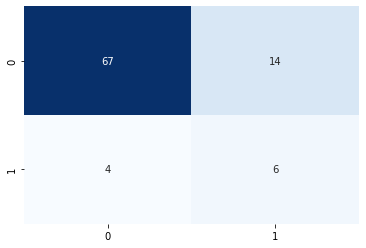

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        81
           1       0.30      0.60      0.40        10

    accuracy                           0.80        91
   macro avg       0.62      0.71      0.64        91
weighted avg       0.87      0.80      0.83        91



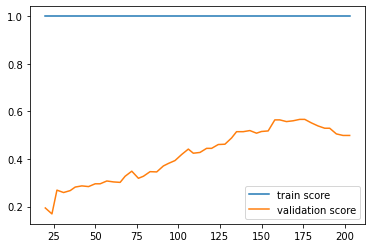

In [ ]:
# KNN
from sklearn.model_selection import GridSearchCV
hyperparameters = {'n_neighbors': np.arange(1,50), 'metric': ['euclidean','manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), hyperparameters, cv=5, scoring="f1")
grid.fit(X_train,y_train)
n_neighbors,metric = grid.best_params_['n_neighbors'],grid.best_params_['metric']
print(f"Best f1 score : {grid.best_score_} for hyperparameters : {grid.best_params_}")
evaluation(grid.best_estimator_)
if best_score<grid.best_score_:
    best_score = grid.best_score_
    model_name = "K Nearest Neighbors"

Best f1 score : 0.6851648351648352 for hyperparameters : {'C': 2.8999999999999995, 'gamma': 1e-05, 'kernel': 'linear'}


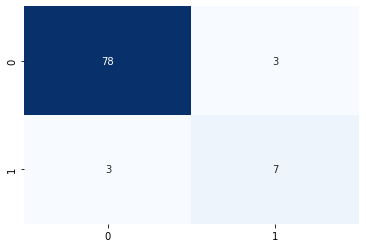

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        81
           1       0.70      0.70      0.70        10

    accuracy                           0.93        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.93      0.93      0.93        91



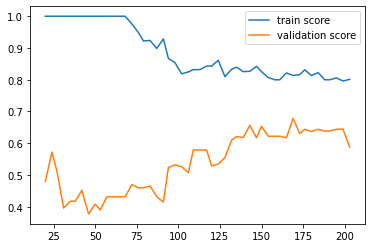

In [57]:
from sklearn.svm import SVC
hyperparameters = {'C': np.arange(0.5,5,0.2), 'kernel':['linear', 'rbf', 'sigmoid', 'poly'], 'gamma':np.linspace(1e-5,1,60)}
grid = GridSearchCV(SVC(), hyperparameters, scoring="f1", cv=5)
grid.fit(X_train,y_train)
C, kernel, gamma = grid.best_params_['C'],grid.best_params_['kernel'],grid.best_params_['gamma']    
print(f"Best f1 score : {grid.best_score_} for hyperparameters : {grid.best_params_}")
evaluation(grid.best_estimator_)
if best_score<grid.best_score_:
    best_score = grid.best_score_
    model_name = "SVM"

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred=grid.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        81
           1       0.70      0.70      0.70        10

    accuracy                           0.93        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.93      0.93      0.93        91

